# 理论

## 梯度
我们可以连结一个多元函数对其<font color=red>所有变量的偏导数</font>，以得到该函数的*梯度*（gradient）向量。
具体而言，设函数$f:\mathbb{R}^n\rightarrow\mathbb{R}$的输入是
一个$n$维向量$\mathbf{x}=[x_1,x_2,\ldots,x_n]^\top$，并且输出是一个标量。
函数$f(\mathbf{x})$相对于$\mathbf{x}$的梯度是一个包含$n$个偏导数的向量:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$$

其中$\nabla_{\mathbf{x}} f(\mathbf{x})$通常在没有歧义时被$\nabla f(\mathbf{x})$取代。

链式法则
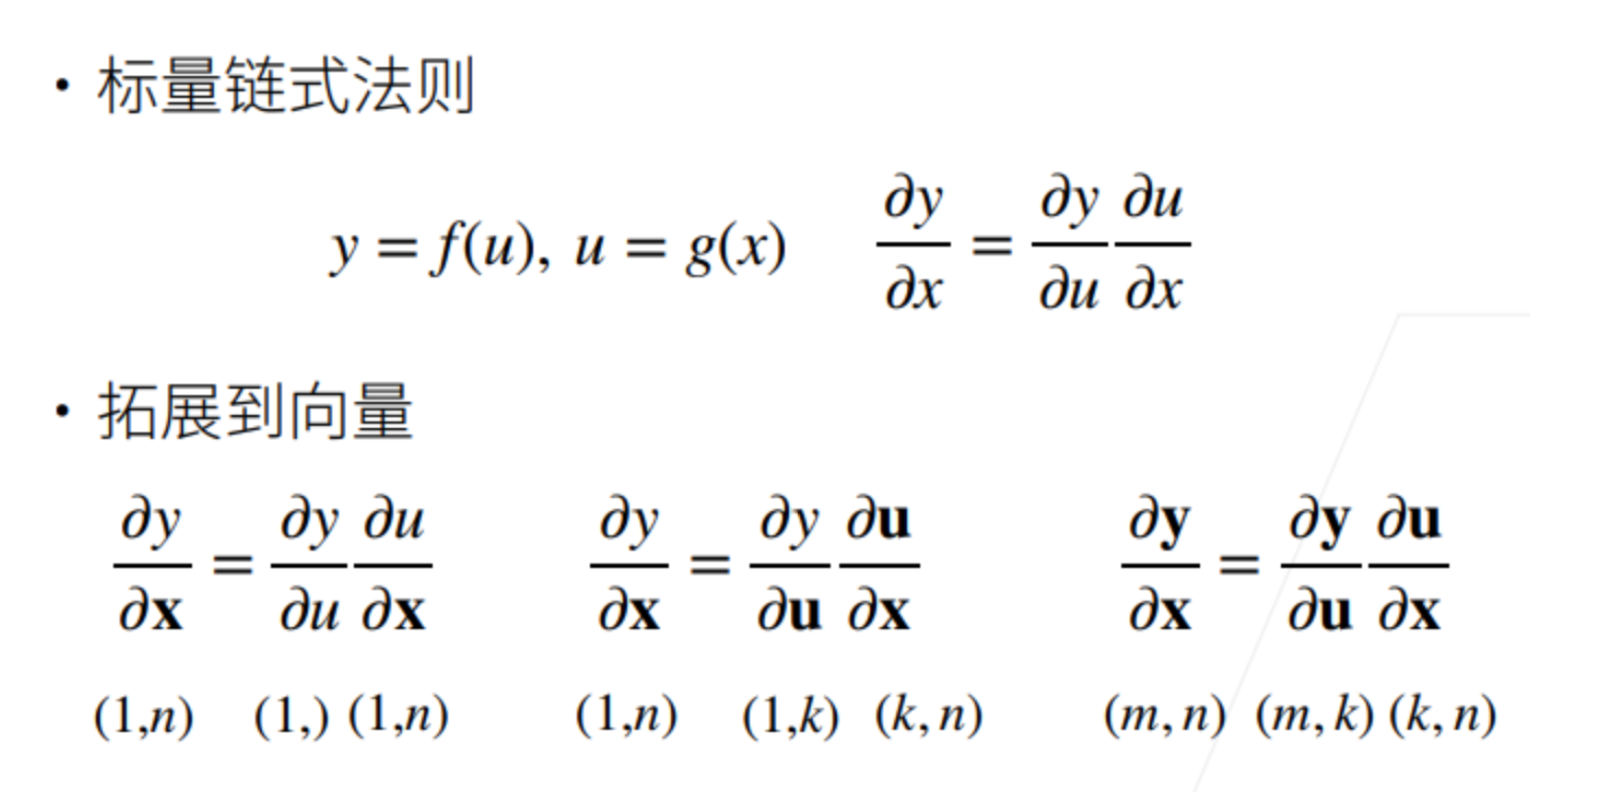
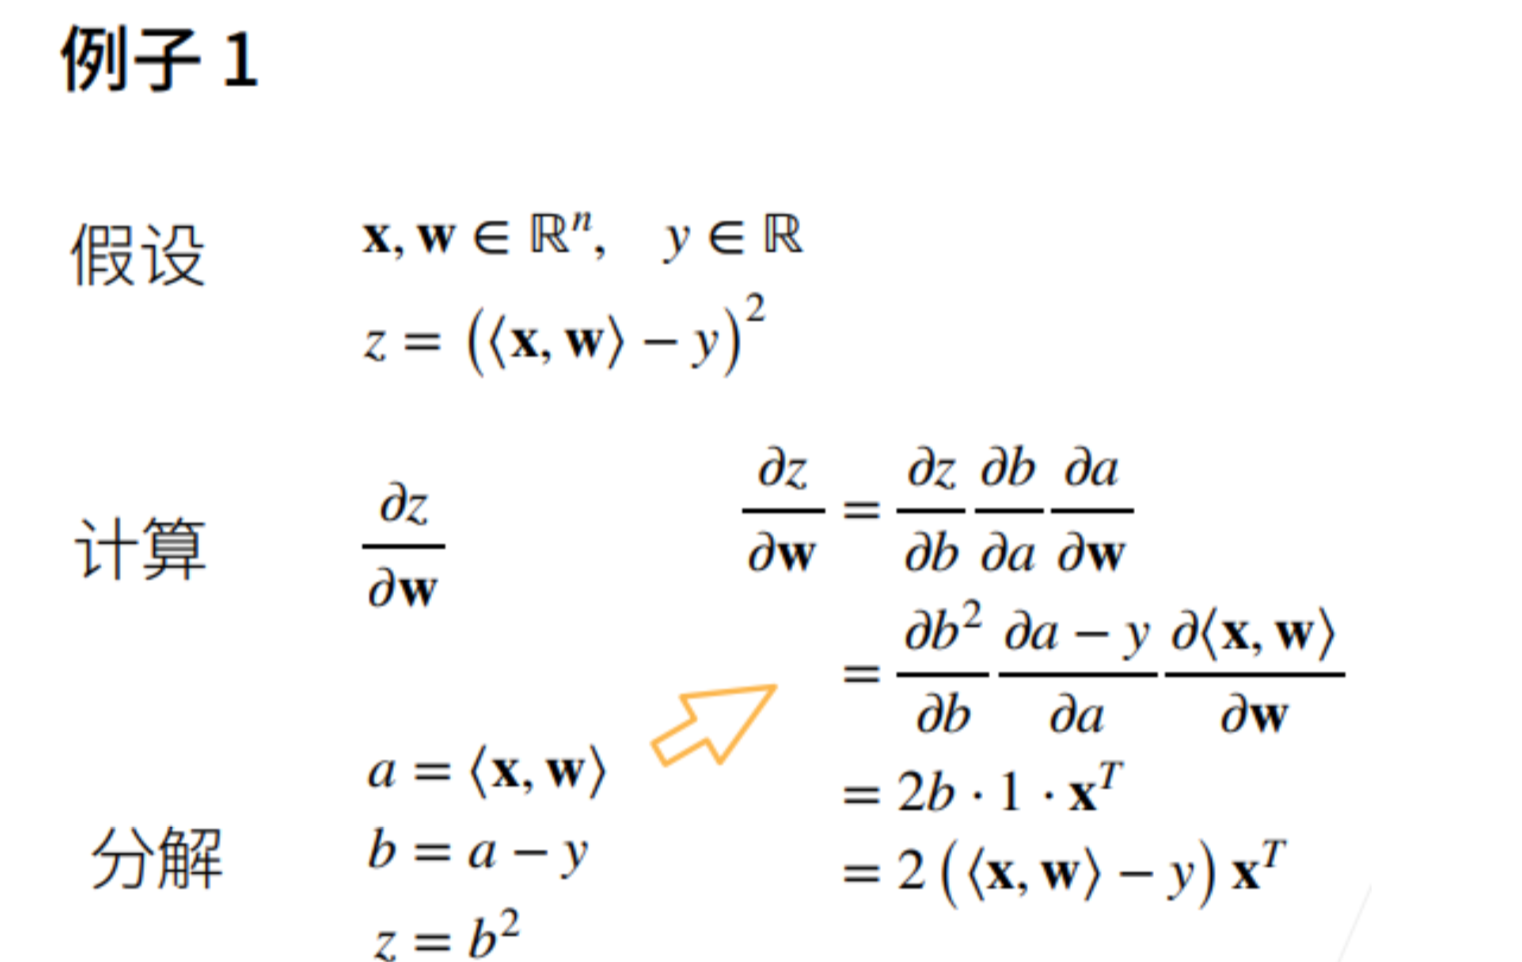

<font color=red>自动求导：自动求导计算一个函数在指定值上的导数
- PyTorch 通过构建计算图来实现自动求导。计算图是一种有向无环图（DAG），其中节点表示变量（如张量），边表示操作（如加法、乘法等）
  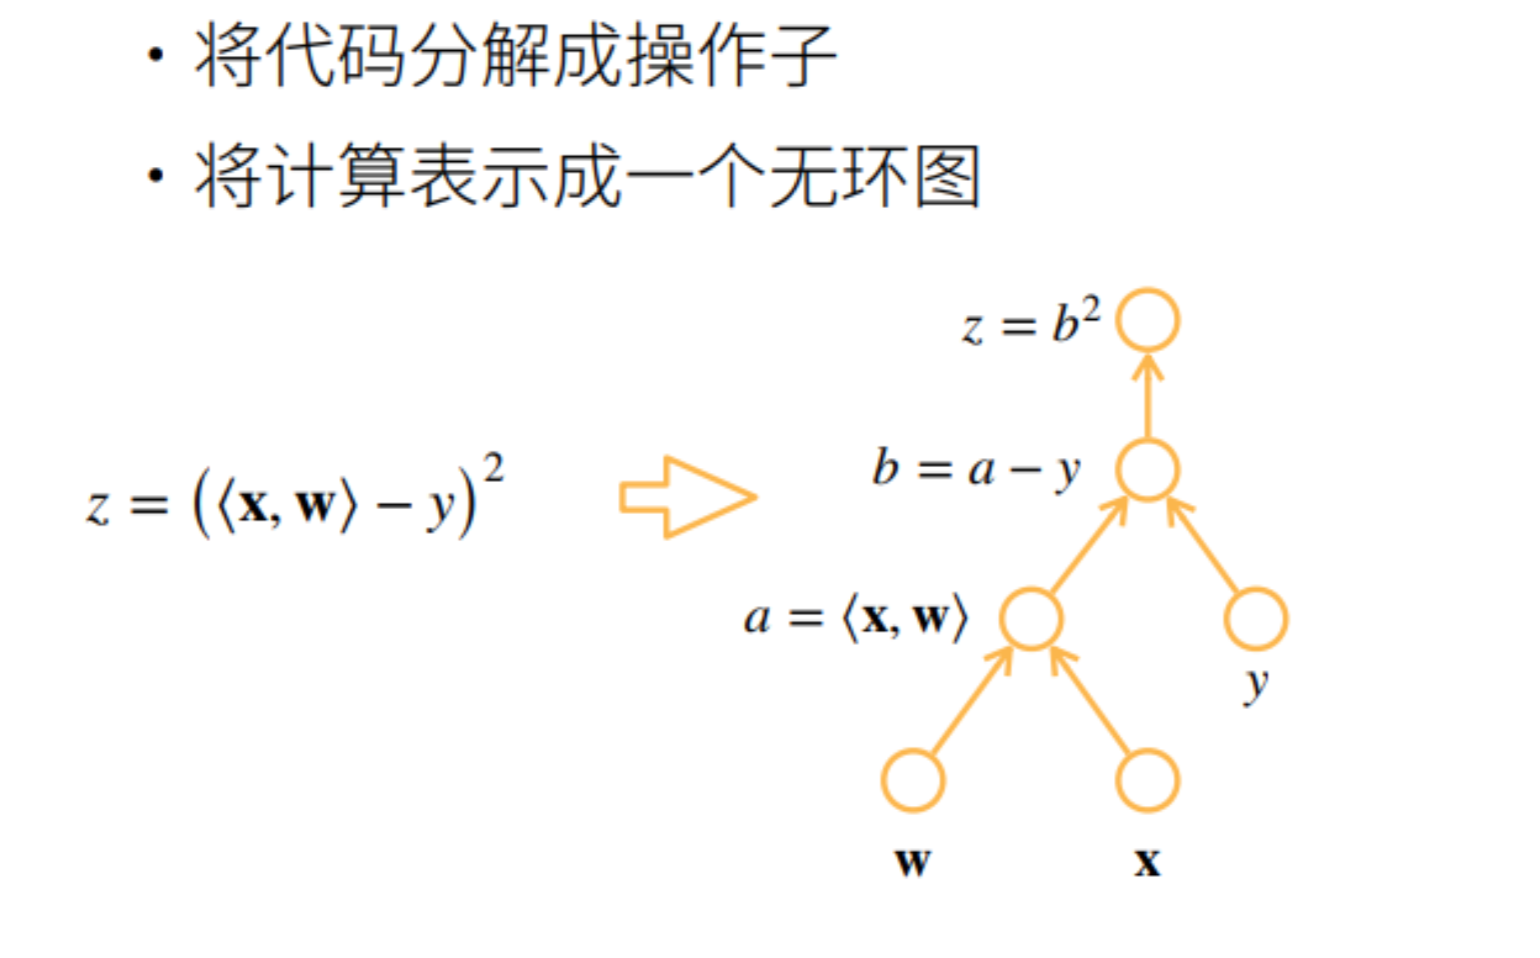

<font color=red>显式构造  • Tensorflow/Theano/MXNet  
隐式构造  • PyTorch/MXNet

两种模式 
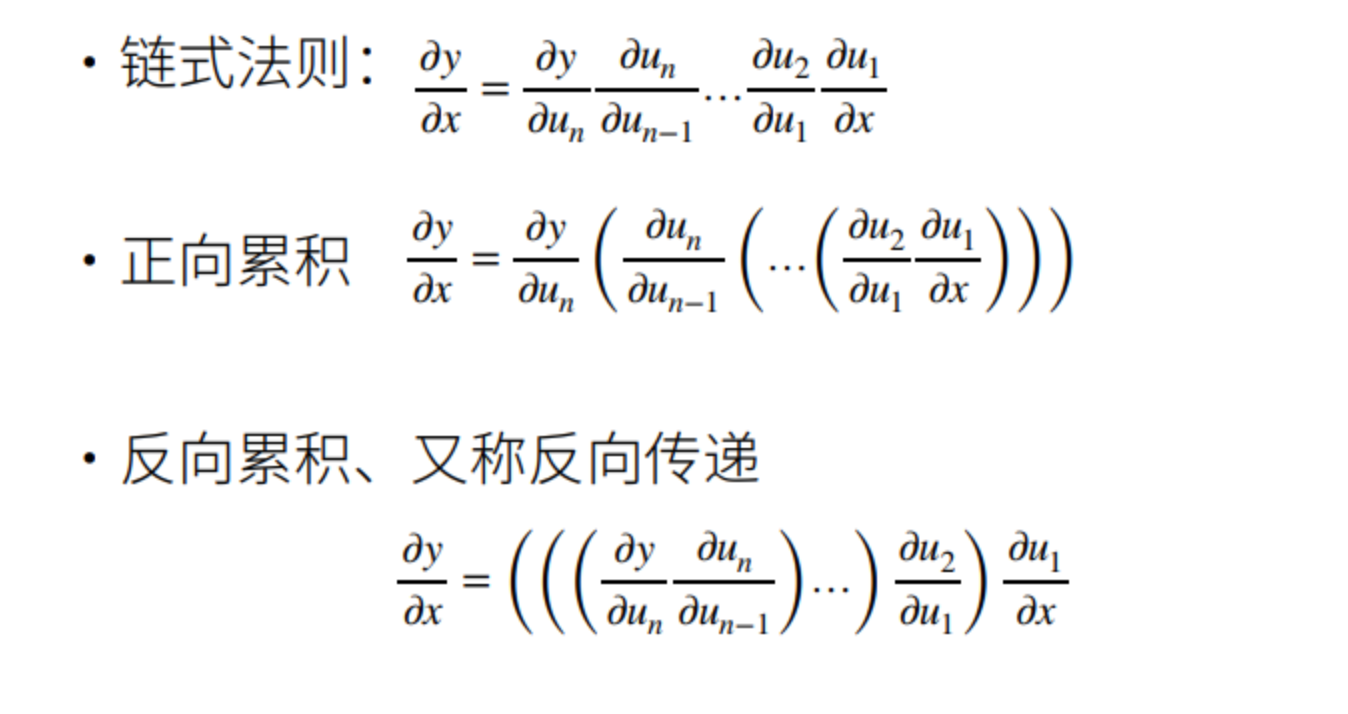
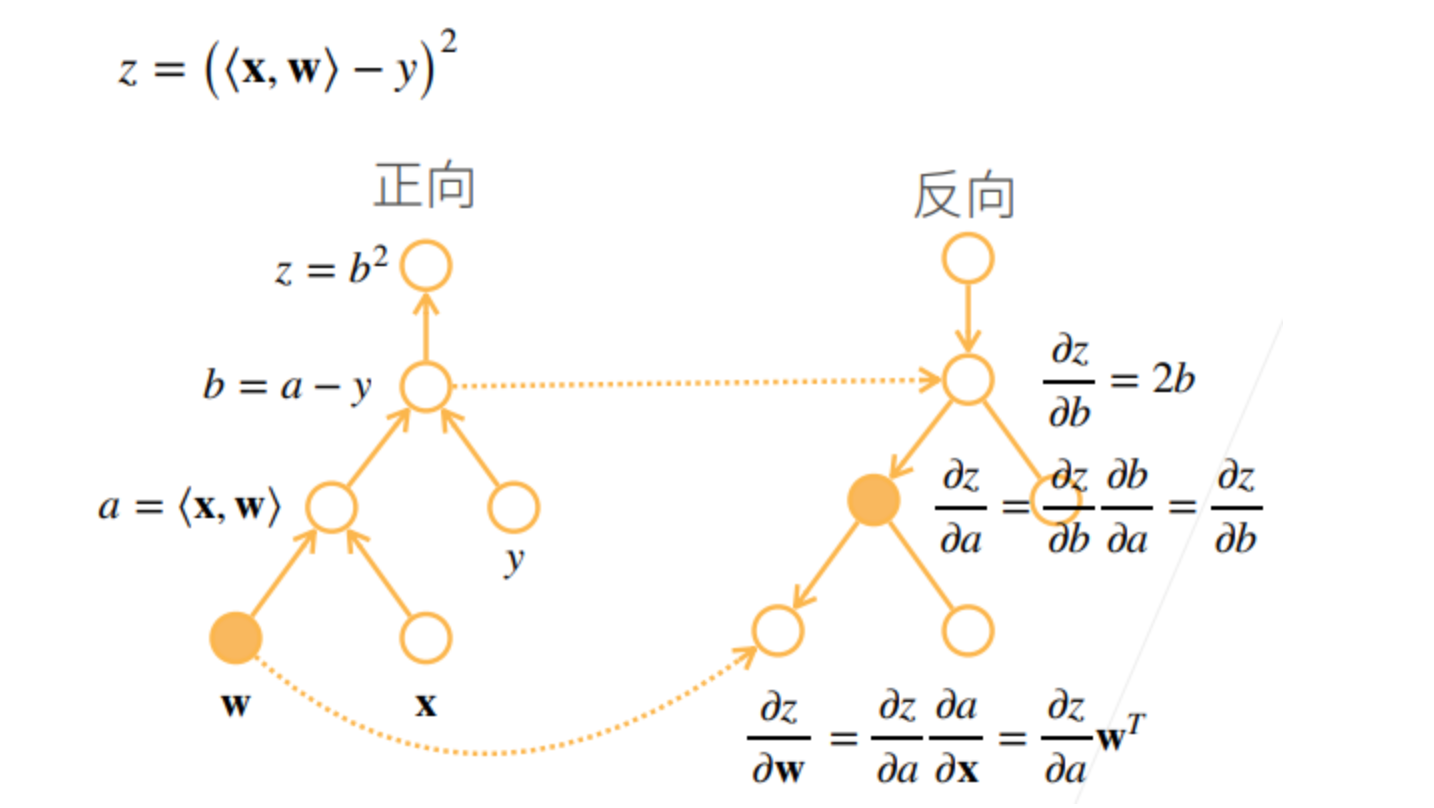

总结： 
正向需要记录下所有值，反向要是不需要的可以扔掉。但是反向也需要用正向的中间结果
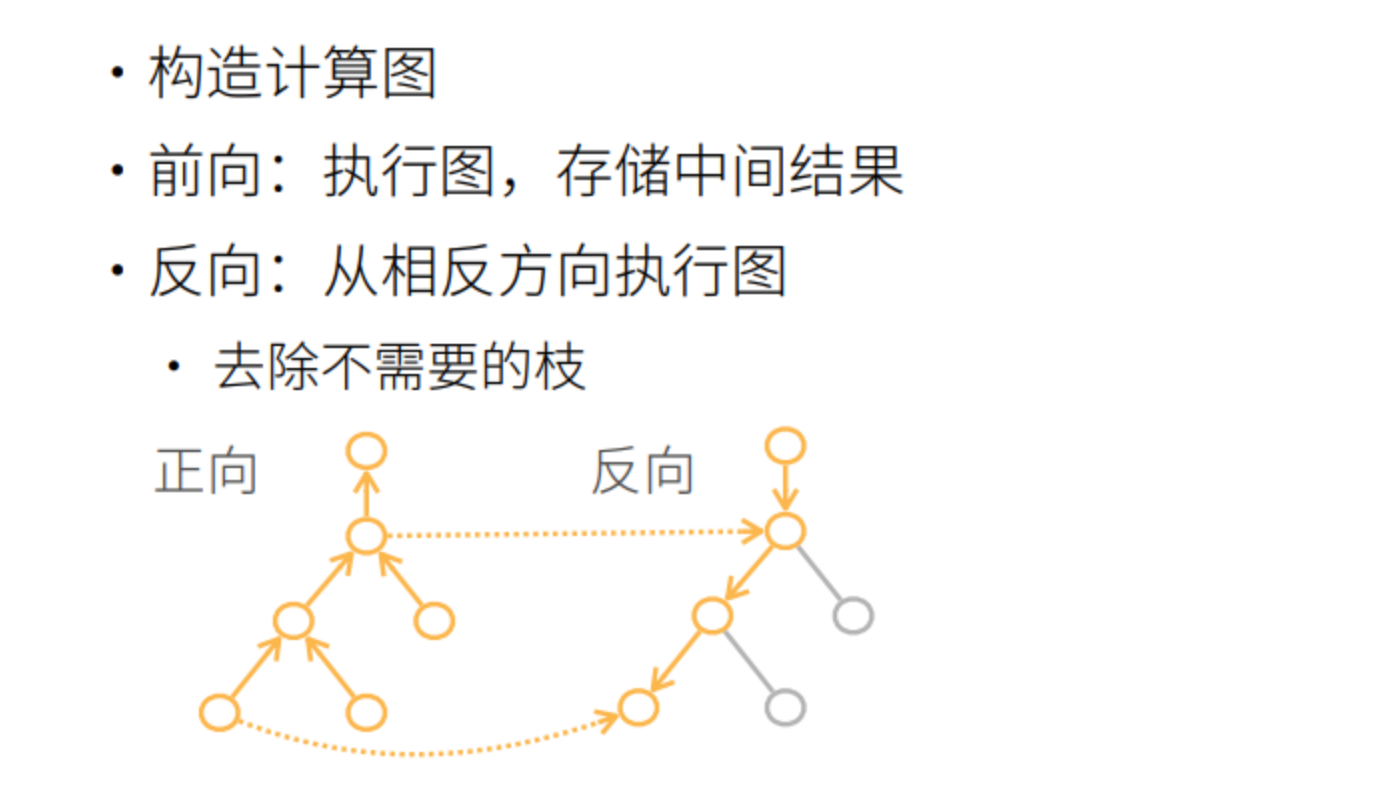

<font color=red> 同一个函数正向传播和反向传播的代码差不多，都是跑一遍。内存复杂度是O(n)，这也是为什么深度神经网络特别耗gpu资源：梯度需要前面结果都存下来～

# 代码

- 当你对一个张量调用backward函数时，PyTorch 会根据计算图和链式法则（Chain Rule）来计算该张量的梯度。

In [1]:
import torch
x = torch.arange(4.0,requires_grad=True) #在外面计算y关于x的梯度之前，需要先存储梯度
y = 2 * torch.dot(x,x)
y.backward() #反向传播

In [3]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [5]:
# 默认情况下，PyTorch会累积梯度，需要清除之前的值
x.grad.zero_() # y.backward() 后才能产生梯度，才能梯度清零，没有反向传播，无法梯度清零
y = x.sum() # 这里的y是一个标量，sum函数其实就是x_1+x_2+...x_n，求偏导自然是全1啊
y.backward()
print(x.grad)

tensor([1., 1., 1., 1.])


以上y都是标量，没错，其实我们很少对向量求导，如果y和x都是向量，那么求导就会得到矩阵，但是在dl中我们很少做这个事情。          

**在深度学习中，目的不是计算微分矩阵，而是批量中每个样本单独计算的偏导数之和。**

💡 可以将某些计算移动到记录的计算图之外。detach方法可以实现

In [11]:
x.grad.zero_()
y=x*x
u=y.detach()   #u是不参与梯度计算的张量 
z=u*x

z.sum().backward()
x.grad,x.grad==u

(tensor([0., 1., 4., 9.]), tensor([True, True, True, True]))

In [13]:
x.grad.zero_()
y.sum().backward()
x.grad==2*x

tensor([True, True, True, True])

对于控制流也可以使用导数

这就是隐式构造的好处！

In [37]:
def f(a):
    b = a * 2
    while b.norm() < 1000: # norm是L2范数
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c
a=torch.randn(size=(),requires_grad=True) #size=() 表示生成的随机数是一个标量（即单个数值）
d=f(a) # 调用函数
d.backward()
print(a.grad)
a.grad == d/a # d是a的线性函数，所以导数就是斜率d/a

tensor(2048.)


tensor(True)